In [1]:
import matplotlib.pyplot as plt
import json

import json
import matplotlib.pyplot as plt
import os
import glob


In [2]:
## 가우시안 추가
def get_data(directory, e, unit, latent_dim):
    file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

    dirlist  = os.listdir(directory)
    # lmbdas = set([0])
    lmbdas = set([])
    for d in dirlist:
        if not 'lmbda=' in d:
            continue
        start = d.find('lmbda=') + len('lmbda=')
        end = d.find('-encoder', start)
        end = d.find('-dec', start)
        lmbda_value = float(d[start:end])
        # print(lmbda_value)
        lmbdas.add(lmbda_value)

    # print(lmbdas)
    lmbdas = sorted(lmbdas)
    # lmbdas = lmbdas[1:19]
    print(lmbdas)
    data_dict = {}

    if 0 in lmbdas:
        for file_path in file_list:
            if (not f'lmbda' in file_path) and f'units={unit}' in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[0].append(json.loads(line))

    for l in lmbdas: 
        data_dict[l] = []
    for l in lmbdas:
        for file_path in file_list:
            if f'lmbda={l}' in file_path and f'units={unit}' in file_path and f'latent_dim={latent_dim}' in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        try:
                            data_dict[l].append(json.loads(line))
                        except json.JSONDecodeError as err:
                            print(f"JSONDecodeError: {err} in line: {line}")

    def get_rate_mse(e, data):
        for entry in data:
            if entry['epoch'] == e:
                return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
        return None, None, None, None  # 해당 epoch이 없을 경우

    # sub_lmbdas = [1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]
        
    data = [get_rate_mse(e, data_dict[l]) for l in lmbdas]
    # sorted_data = sorted(data, key=lambda x: x[1])
    return data, lmbdas, data_dict

dim = 1024
e = 79
unit = '1000'
directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/gaussian/gaussian_default'

# 요소를 나누기 위한 함수
def divide_non_none_elements(input_list, n):
    return [x / n for x in input_list if x is not None]

# for l_dim in ['400', '500', '600', '800', '1000']:
for l_dim in ['1000']:
    data, lmbdas, data_dict = get_data(directory, e, unit, l_dim)

    # 데이터 전처리
    val_rate = [entry[0] for entry in data]
    val_mse = [entry[1] for entry in data]
    rate = [entry[2] for entry in data]
    mse = [entry[3] for entry in data]

    val_rate = divide_non_none_elements(val_rate, 1)
    val_mse = divide_non_none_elements(val_mse, 1)
    rate = divide_non_none_elements(rate, 1)
    mse = divide_non_none_elements(mse, 1)

plot_data = {}
plot_data['gaussian'] = {'val_mse': val_mse, 'val_rate':val_rate, 'mse': mse, 'rate': rate}

[0.3, 1.0, 3.0, 10.0, 30.0, 100.0, 300.0]


In [3]:
def divide_non_none_elements(input_list, n):
    # 각 요소가 None이 아닐 경우 n으로 나누고, None일 경우 그대로 유지
    # return [x / n if x is not None else x for x in input_list]
    return [x / n for x in input_list if x is not None]


def get_data(directory, e):
    file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

    dirlist  = os.listdir(directory)
    # lmbdas = set([0])
    lmbdas = set([])
    for d in dirlist:
        if not 'lmbda=' in d:
            continue
        start = d.find('lmbda=') + len('lmbda=')
        end = d.find('-encoder', start)
        lmbda_value = float(d[start:end])
        # print(lmbda_value)
        lmbdas.add(lmbda_value)

    # print(lmbdas)
    lmbdas = sorted(lmbdas)
    # lmbdas = lmbdas[1:19]
    # print(lmbdas)
    data_dict = {}

    if 0 in lmbdas:
        for file_path in file_list:
            if (not f'lmbda' in file_path):
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[0].append(json.loads(line))

    for l in lmbdas: 
        data_dict[l] = []
    for l in lmbdas:
        for file_path in file_list:
            if (f'lmbda={l}' in file_path):
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[l].append(json.loads(line))


    def get_rate_mse(e, data):
        for entry in data:
            if entry['epoch'] == e:
                return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
        return None, None, None, None  # 해당 epoch이 없을 경우

    # sub_lmbdas = [1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]
        
    data = [get_rate_mse(e, data_dict[l]) for l in lmbdas]
    # sorted_data = sorted(data, key=lambda x: x[1])
    return data, lmbdas, data_dict

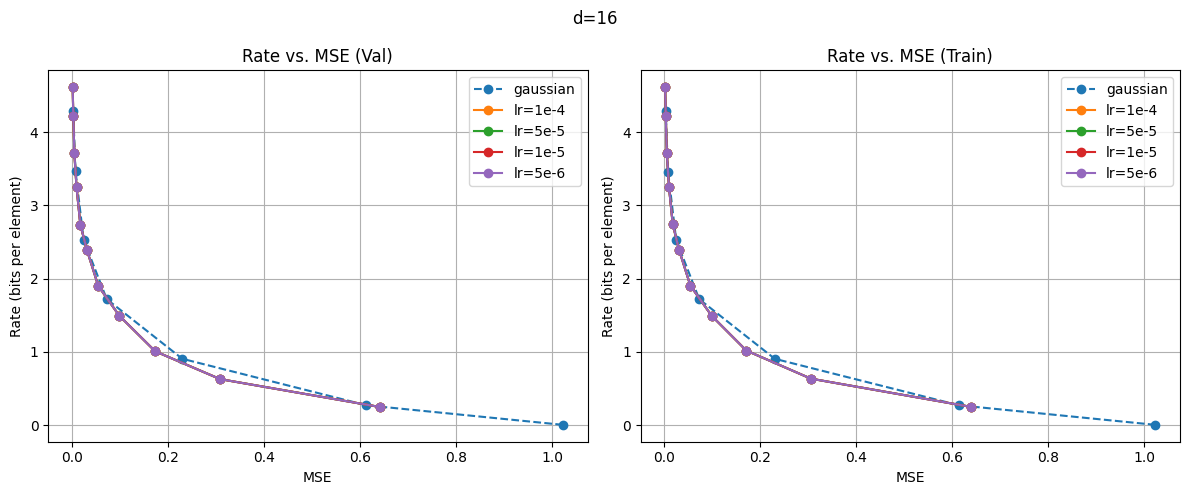

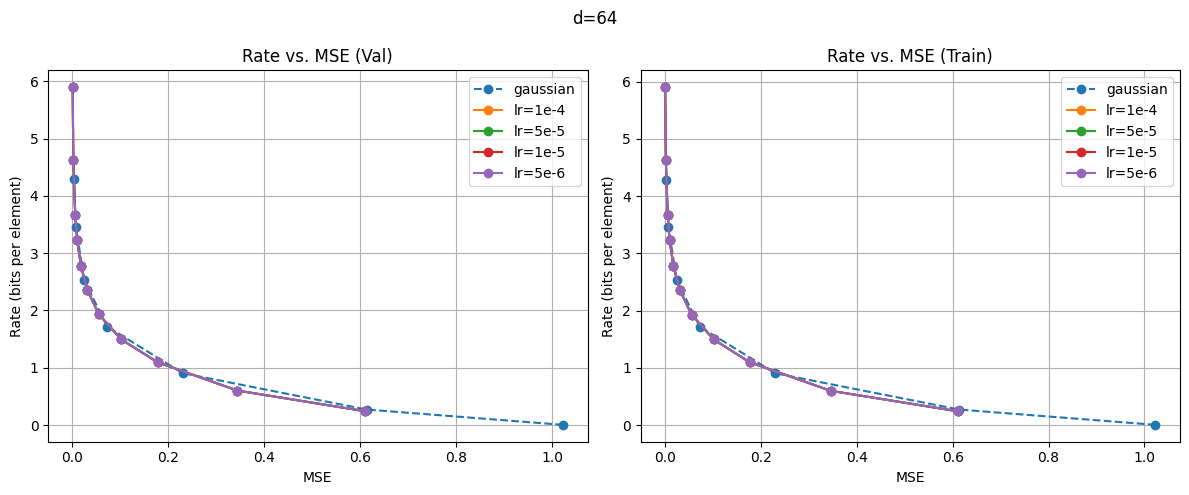

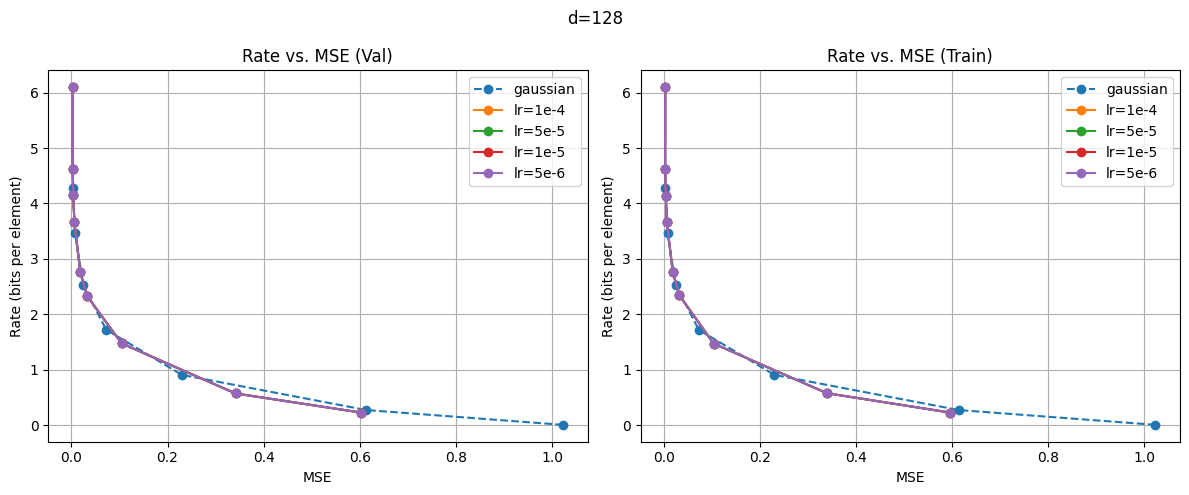

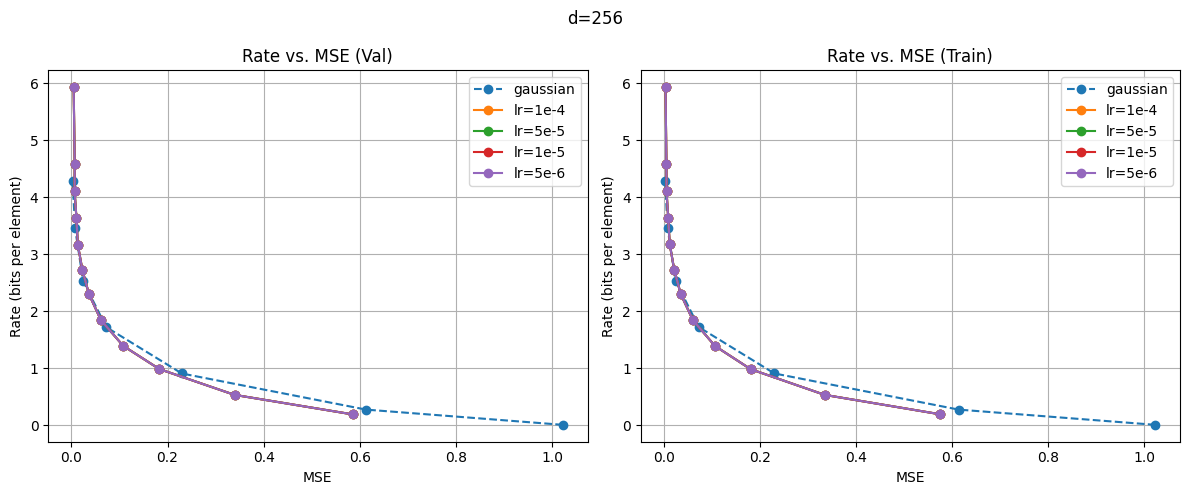

예외 발생: [Errno 2] No such file or directory: '/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_layers-0_q_proj_out/llama3-8B_d512_b1024_e150_lr1e-5_normalize'
예외 발생: [Errno 2] No such file or directory: '/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_layers-0_q_proj_out/llama3-8B_d512_b1024_e150_lr1e-5_normalize'
예외 발생: [Errno 2] No such file or directory: '/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_layers-0_q_proj_out/llama3-8B_d512_b1024_e150_lr1e-5_normalize'
예외 발생: [Errno 2] No such file or directory: '/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_layers-0_q_proj_out/llama3-8B_d512_b1024_e150_lr1e-5_normalize'


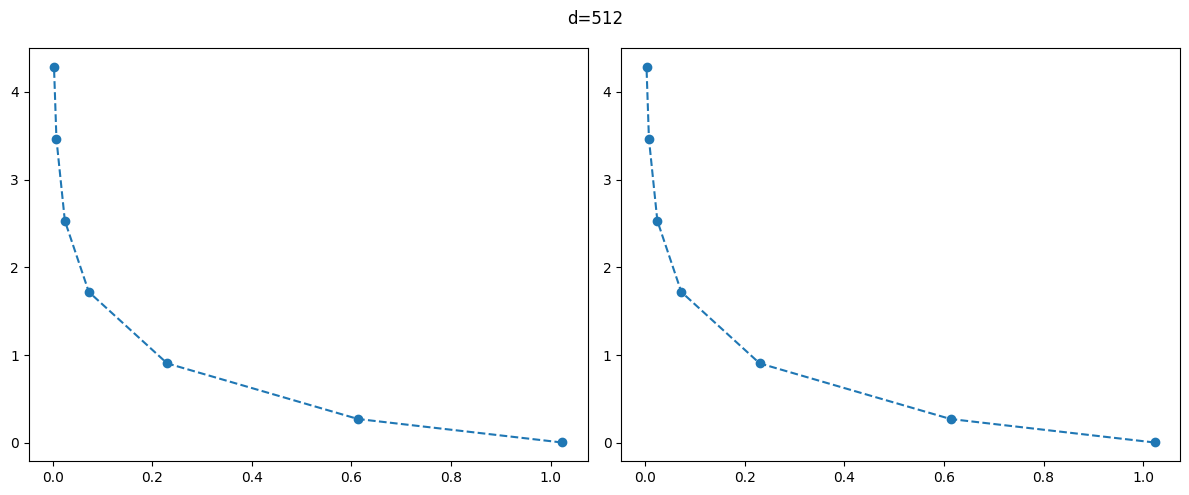

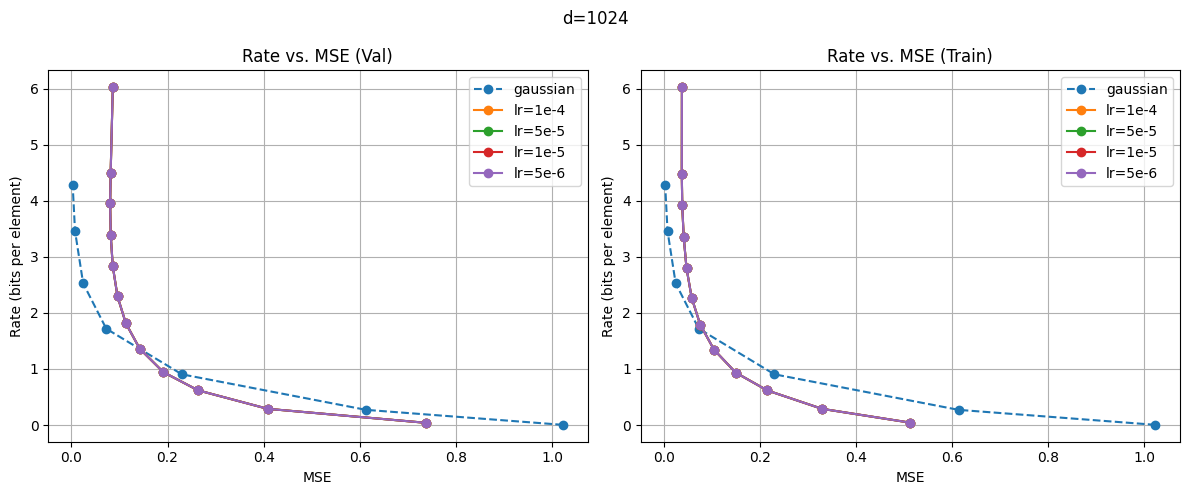

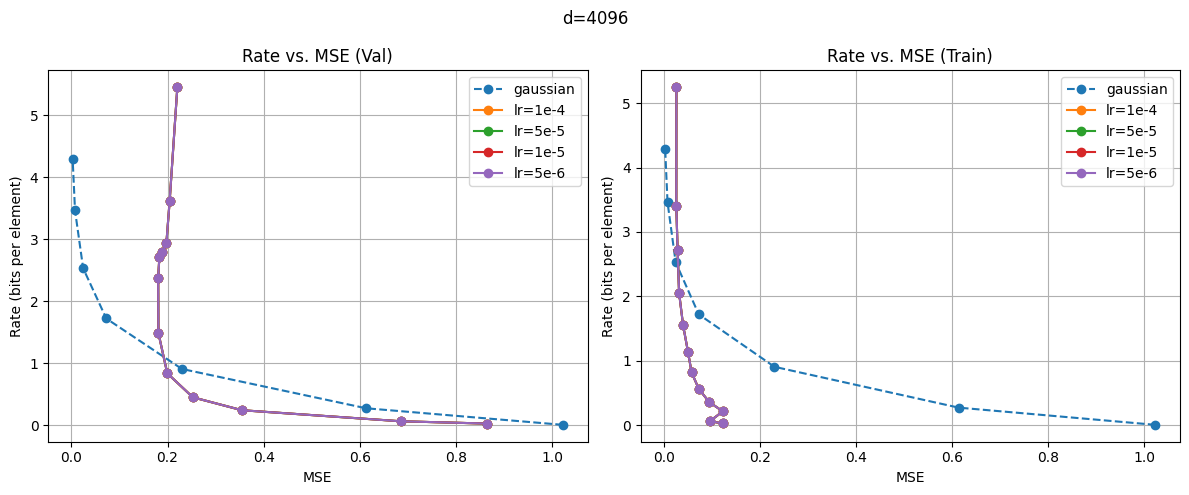

In [4]:

# directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3-8B_d1024_b1024_e600_normalize'
# e = 599
# unit = '2000_2000_2000'

# e = 80
# unit = '500_500'
# directory = '/home/jgryu/Weight_compression/RD-sandwich/checkpoints/llama-2-7b_attn_d=32_b=1024'

e = 149
b = 1024
for  dim in [16, 64, 128, 256, 512, 1024, 4096]:
    # if dim == 16:
    #     b = 2048
    # else :
    #     b = 1024
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'd={dim}')
    
    for l, v in plot_data.items():
        plt.subplot(1, 2, 1) 
        plt.plot(v['mse'], v['rate'], marker = 'o', linestyle='--', label=l)
        plt.subplot(1, 2, 2) 
        plt.plot(v['mse'], v['rate'], marker = 'o', linestyle='--', label=l)
    
    for lr in ['1e-4', '5e-5', '1e-5', '5e-6']:
        try:
            # directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3_mlp/llama3-8B_d{dim}_b1024_e150_lr{lr}_normalize'
            # if dim == 16: directory += '_2'
            # directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3_attn/attn_llama3-8B_d{dim}_b1024_e150_lr{lr}_normalize'
            # directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama2_mlp/llama2-7B_d{dim}_b1024_e150_lr{lr}_normalize'
            # directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama2_attn/llama2-7B_d{dim}_b1024_e150_lr{lr}_normalize'
            # directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_mlp_in/llama3-8B_d{dim}_b1024_e150_lr{lr}_normalize'
            # directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_attn_in/llama3-8B_d{dim}_b1024_e150_lr{lr}_normalize'
            directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v3/llama3_8B_layers-0_q_proj_out/llama3-8B_d{dim}_b1024_e150_lr1e-5_normalize'
            data, lmbdas, data_dict = get_data(directory, e)
            val_rate = [entry[0] for entry in data]
            val_mse = [entry[1] for entry in data]
            val_rate = divide_non_none_elements(val_rate, 1)
            val_mse = divide_non_none_elements(val_mse, 1)
            
            plt.subplot(1, 2, 1) 
            plt.plot(val_mse, val_rate, marker='o', linestyle='-', label=f'lr={lr}')
            plt.title('Rate vs. MSE (Val)')
            plt.xlabel('MSE')
            plt.ylabel('Rate (bits per element)')
            plt.legend()
            plt.grid(True)

            rate = [entry[2] for entry in data]
            mse = [entry[3] for entry in data]
            rate = divide_non_none_elements(rate, 1)
            mse = divide_non_none_elements(mse, 1)
            
            plt.subplot(1, 2, 2)
            plt.plot(mse, rate, marker='o', linestyle='-', label=f'lr={lr}')
            plt.title('Rate vs. MSE (Train)')
            plt.xlabel('MSE')
            plt.ylabel('Rate (bits per element)')
            plt.legend()
            plt.grid(True)

            # print(f'lr: {lr}')
            # for i in range(len(data)):
            #     print(data[i], lmbdas[i])
        except Exception as err:
            print(f"예외 발생: {err}")
            continue
        
    plt.tight_layout()
    plt.show()


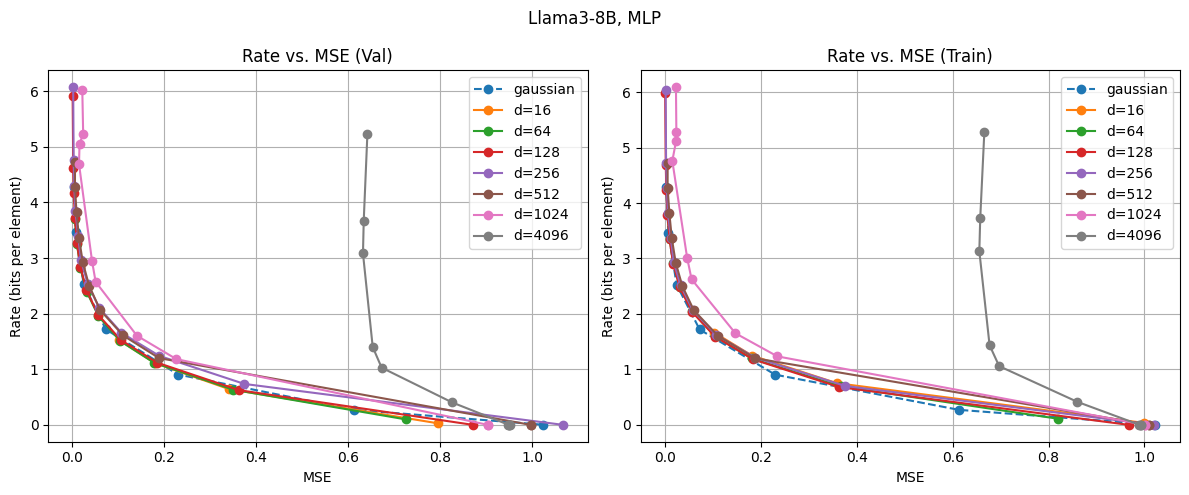

In [6]:
## 좋은 것만 그리기
import matplotlib.pyplot as plt
import json

import json
import matplotlib.pyplot as plt
import os
import glob

e = 149
b = 1024
title =  'Llama3-8B, MLP'
pairs = [(16, '5e-5'),
         (64, '5e-6'),
         (128, '1e-4'), 
         (256, '1e-4'), 
         (512, '1e-4'), 
         (1024, '5e-5'),
         (4096, '1e-5')]
         
# title =  'Llama3-8B, attn'
# pairs = [(16, '5e-5'),
#          (256, '5e-6'), 
#          (1024, '1e-5'),
#          (4096, '1e-5')]
# title =  'Llama2-7B, MLP'
# pairs = [(16, '1e-5'),
#          (64, '5e-5'), 
#          (128, '1e-4'), 
#          (256, '5e-6'),
#          (4096, '1e-5')]
# title =  'Llama2-7B, Attn'
# pairs = [(128, '5e-6'),
#          (1024, '1e-5'),
#          (4096, '1e-5')]

plt.figure(figsize=(12, 5))
plt.suptitle(title)

for l, v in plot_data.items():
    plt.subplot(1, 2, 1) 
    plt.plot(v['mse'], v['rate'], marker = 'o', linestyle='--', label=l)
    plt.subplot(1, 2, 2) 
    plt.plot(v['mse'], v['rate'], marker = 'o', linestyle='--', label=l)

for  dim, lr in pairs:
    try:
        directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3_mlp/llama3-8B_d{dim}_b1024_e150_lr{lr}_normalize'
        # if dim == 16: directory += '_2'
        if dim == 1024: directory += '_0'
        # directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3_attn/attn_llama3-8B_d{dim}_b1024_e150_lr{lr}_normalize'
        # directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama2_mlp/llama2-7B_d{dim}_b1024_e150_lr{lr}_normalize'
        # directory = f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama2_attn/llama2-7B_d{dim}_b1024_e150_lr{lr}_normalize'
        data, lmbdas, data_dict = get_data(directory, e)
        val_rate = [entry[0] for entry in data]
        val_mse = [entry[1] for entry in data]
        val_rate = divide_non_none_elements(val_rate, 1)
        val_mse = divide_non_none_elements(val_mse, 1)
        
        plt.subplot(1, 2, 1) 
        plt.plot(val_mse, val_rate, linestyle='-',marker = 'o', label=f'd={dim}')
        plt.title('Rate vs. MSE (Val)')
        plt.xlabel('MSE')
        plt.ylabel('Rate (bits per element)')
        plt.legend()
        plt.grid(True)

        rate = [entry[2] for entry in data]
        mse = [entry[3] for entry in data]
        rate = divide_non_none_elements(rate, 1)
        mse = divide_non_none_elements(mse, 1)
        
        plt.subplot(1, 2, 2)
        plt.plot(mse, rate, linestyle='-', marker = 'o', label=f'd={dim}')
        plt.title('Rate vs. MSE (Train)')
        plt.xlabel('MSE')
        plt.ylabel('Rate (bits per element)')
        plt.legend()
        plt.grid(True)

        # print(f'lr: {lr}')
        # for i in range(len(data)):
        #     print(data[i], lmbdas[i])
    except Exception as err:
        print(f"예외 발생: {err}")
        continue
    
plt.tight_layout()
plt.show()


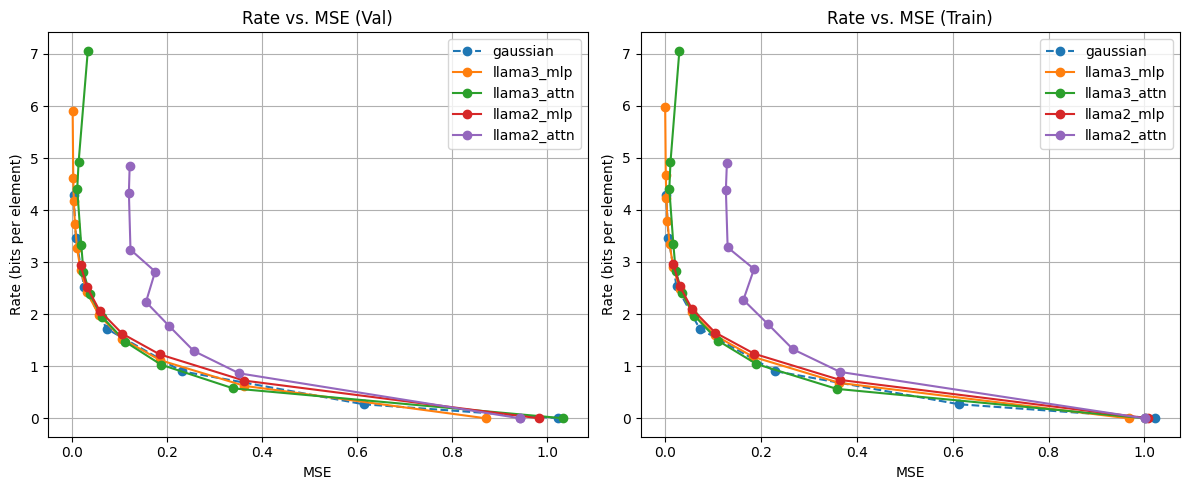

In [7]:
## 좋은 것만 그리기
import matplotlib.pyplot as plt
import json

import json
import matplotlib.pyplot as plt
import os
import glob

e = 149
b = 1024
## 3-8B mlp
# pairs = [(16, '5e-5'),
#          (64, '5e-6'),
#          (128, '1e-4'), 
#          (256, '1e-4'), 
#          (512, '1e-4'), 
#          (1024, '5e-5')]
# ## 3-8B mlp
# pairs = [(16, '5e-5'),
#          (256, '5e-6'), 
#          (1024, '1e-5'),
#          (4096, '1e-5')]
# ## 2-7B mlp
# pairs = [(16, '1e-5'),
#          (64, '5e-5'), 
#          (128, '1e-4'), 
#          (256, '5e-6'),
#          (4096, '1e-5')]
# ## 2-7B attn
# pairs = [(128, '5e-6'),
#          (1024, '1e-5'),
#          (4096, '1e-5')]

directories = [(f"/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3_mlp/llama3-8B_d{128}_b1024_e150_lr{'1e-4'}_normalize", 'llama3_mlp'),
               (f"/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3_attn/attn_llama3-8B_d{256}_b1024_e150_lr{'5e-6'}_normalize",'llama3_attn'),
                (f"/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama2_mlp/llama2-7B_d{128}_b1024_e150_lr{'1e-4'}_normalize",'llama2_mlp'),
                (f"/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama2_attn/llama2-7B_d{1024}_b1024_e150_lr{'1e-5'}_normalize",'llama2_attn'),
               ]

plt.figure(figsize=(12, 5))
# plt.suptitle(f'Llama2-7B, Attn')

for l, v in plot_data.items():
    plt.subplot(1, 2, 1) 
    plt.plot(v['mse'], v['rate'], marker='o', linestyle='--', label=l)
    plt.subplot(1, 2, 2) 
    plt.plot(v['mse'], v['rate'], marker='o', linestyle='--', label=l)

for  directory, label in directories:
    try:
        data, lmbdas, data_dict = get_data(directory, e)
        val_rate = [entry[0] for entry in data]
        val_mse = [entry[1] for entry in data]
        val_rate = divide_non_none_elements(val_rate, 1)
        val_mse = divide_non_none_elements(val_mse, 1)
        
        plt.subplot(1, 2, 1) 
        plt.plot(val_mse, val_rate, marker='o', linestyle='-', label=label)
        plt.title('Rate vs. MSE (Val)')
        plt.xlabel('MSE')
        plt.ylabel('Rate (bits per element)')
        plt.legend()
        plt.grid(True)

        rate = [entry[2] for entry in data]
        mse = [entry[3] for entry in data]
        rate = divide_non_none_elements(rate, 1)
        mse = divide_non_none_elements(mse, 1)
        
        plt.subplot(1, 2, 2)
        plt.plot(mse, rate, marker='o', linestyle='-', label=label)
        plt.title('Rate vs. MSE (Train)')
        plt.xlabel('MSE')
        plt.ylabel('Rate (bits per element)')
        plt.legend()
        plt.grid(True)

        # print(f'lr: {lr}')
        # for i in range(len(data)):
        #     print(data[i], lmbdas[i])
    except Exception as err:
        print(f"예외 발생: {err}")
        continue
plt.tight_layout()
plt.show()


In [8]:
import matplotlib.pyplot as plt
mean = -5.42295056421355e-06
std = 0.011819059083636133
std_squared = std ** 2

directories = [
    (f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3-8B_d1024_b1024_e150_lr5e-5_normalize_2', 'd=1024', '2000_2000'),
    (f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3-8B_d16_b2048_e150_lr1e-5_normalize', 'd=16', '500_500')
]

# 데이터 수집 및 그래프 그리기 함수 정의
def plot_data(directory, e, unit, label):
    data, lmbdas, data_dict = get_data(directory, e, unit)
    
    val_rate = [entry[0] for entry in data]
    val_mse = [entry[1] for entry in data]
    val_rate = divide_non_none_elements(val_rate, 1)
    # val_mse = divide_non_none_elements(val_mse, 1)
    val_mse = [mse * std_squared for mse in divide_non_none_elements(val_mse, 1)]
    
    rate = [entry[2] for entry in data]
    mse = [entry[3] for entry in data]
    rate = divide_non_none_elements(rate, 1)
    # mse = divide_non_none_elements(mse, 1)
    mse = [m * std_squared for m in divide_non_none_elements(mse, 1)]
    
    # Validation subplot
    plt.subplot(1, 2, 1)
    plt.plot(val_mse, val_rate, marker='o', linestyle='-', label=label)
    
    # Training subplot
    plt.subplot(1, 2, 2)
    plt.plot(mse, rate, marker='o', linestyle='-', label=label)

# 그래프 설정
plt.figure(figsize=(12, 5))

# 각 directory에 대해 그래프 생성
for directory, label, unit in directories:
    plot_data(directory=directory, e=149, unit=unit, label=label)

# Validation subplot 설정
plt.subplot(1, 2, 1)
plt.title('Rate vs. MSE (Val)')
plt.xlabel('MSE')
plt.ylabel('Rate (bits per element)')
plt.legend()
plt.grid(True)

# Training subplot 설정
plt.subplot(1, 2, 2)
plt.title('Rate vs. MSE (Train)')
plt.xlabel('MSE')
plt.ylabel('Rate (bits per element)')
plt.legend()
plt.grid(True)

# 서브플롯 전체 보여주기
plt.tight_layout()
plt.show()

TypeError: get_data() takes 2 positional arguments but 3 were given

<Figure size 1200x500 with 0 Axes>

In [ ]:
## pt TCM
bbp:  [0.2395166015625, 0.17999658203125, 0.25645166015625, 0.41011279296875, 0.3559677734375, 0.20474365234375]
mse:  [3.747548319786229e-06, 3.2543086858021973e-06, 1.6546020001070832e-06, 4.882529730059444e-07, 7.737870292849991e-07, 2.6613230894290222e-06]

## JPEG 256 -1
0.00014613794 0.426707763671875
0.00014669629 0.4325718994140625
0.00014704333 0.559120361328125
0.00013494283 0.736552490234375
0.000112696354 0.9881512451171875
9.3104405e-05 1.2137393798828124


## JPEG 256 -2
0.00014511003 0.426707763671875
0.00014328405 0.4325718994140625
0.00013564229 0.559120361328125
0.00011696918 0.736552490234375
8.468635e-05 0.9881512451171875
4.9290877e-05 1.2137393798828124

additional_data_1 = [
    (9.913887e-05, 2.4178203125),
    (5.5100238e-05, 3.5805234375),
    (2.6560503e-05, 4.6416953125),
    (1.7865423e-05, 5.0878046875),
    (1.0914863e-05, 5.5610078125),
    (5.6985186e-06, 6.049765625)
]

additional_data_2 = [
    (0.00037705398, 2.4178203125),
    (0.00036618763, 3.5805234375),
    (0.0003267982, 4.6416953125),
    (0.00030393695, 5.0878046875),
    (0.00027659727, 5.5610078125),
    (0.00024437695, 6.049765625)
]

In [ ]:
import matplotlib.pyplot as plt
import glob, os, json

# 기본 통계
mean = -5.42295056421355e-06
std = 0.011819059083636133
std_squared = std ** 2

# 데이터 경로 및 라벨
directories = [
    (f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3-8B_d1024_b1024_e150_lr5e-5_normalize', 'U.B. (,1024)', '2000_2000'),
    (f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/llama3-8B_d16_b2048_e150_lr1e-5_normalize', 'U.B. (,16)', '500_500')
]

# 추가 데이터 세트
additional_data_1 = [
    (9.913887e-05, 2.4178203125),
    (5.5100238e-05, 3.5805234375),
    (2.6560503e-05, 4.6416953125),
    (1.7865423e-05, 5.0878046875),
    (1.0914863e-05, 5.5610078125),
    (5.6985186e-06, 6.049765625)
]

additional_data_2 = [
    (0.00037705398, 2.4178203125),
    (0.00036618763, 3.5805234375),
    (0.0003267982, 4.6416953125),
    (0.00030393695, 5.0878046875),
    (0.00027659727, 5.5610078125),
    (0.00024437695, 6.049765625)
]

# PT TCM 데이터
pt_tcm_data = [
    (3.747548319786229e-06, 0.2395166015625),
    (3.2543086858021973e-06, 0.17999658203125),
    (1.6546020001070832e-06, 0.25645166015625),
    (4.882529730059444e-07, 0.41011279296875),
    (7.737870292849991e-07, 0.3559677734375),
    (2.6613230894290222e-06, 0.20474365234375)
]

# JPEG 256 -1 데이터
jpeg_256_1_data = [
    (0.00014613794, 0.426707763671875),
    (0.00014669629, 0.4325718994140625),
    (0.00014704333, 0.559120361328125),
    (0.00013494283, 0.736552490234375),
    (0.000112696354, 0.9881512451171875),
    (9.3104405e-05, 1.2137393798828124)
]

# JPEG 256 -2 데이터
jpeg_256_2_data = [
    (0.00014511003, 0.426707763671875),
    (0.00014328405, 0.4325718994140625),
    (0.00013564229, 0.559120361328125),
    (0.00011696918, 0.736552490234375),
    (8.468635e-05, 0.9881512451171875),
    (4.9290877e-05, 1.2137393798828124)
]

# 데이터 수집 및 그래프 그리기 함수 정의
def plot_data(directory, e, unit, label):
    data, lmbdas, data_dict = get_data(directory, e)
    
    val_rate = [entry[0] for entry in data]
    val_mse = [entry[1] for entry in data]
    val_rate = divide_non_none_elements(val_rate, 1)
    val_mse = [mse * std_squared for mse in divide_non_none_elements(val_mse, 1)]
    
    # Validation subplot
    plt.plot(val_mse, val_rate, marker='o', linestyle='-', label=label)

# 그래프 설정
plt.figure(figsize=(8, 5))

# 각 directory에 대해 Validation subplot 생성
for directory, label, unit in directories:
    plot_data(directory=directory, e=149, unit=unit, label=label)

# 추가 데이터 그래프에 추가
additional_mse_1 = [entry[0] for entry in additional_data_1]
additional_rate_1 = [entry[1] for entry in additional_data_1]
additional_mse_2 = [entry[0] for entry in additional_data_2]
additional_rate_2 = [entry[1] for entry in additional_data_2]

# Validation subplot에 추가 데이터 그리기
# plt.plot(additional_mse_1, additional_rate_1, marker='x', linestyle='--', color='red', label='JPEG-32_1')
plt.plot(additional_mse_2, additional_rate_2, marker='s', linestyle='--', color='blue', label='JPEG-32_2')

# PT TCM 데이터 추가
pt_tcm_mse = [entry[0]*10 for entry in pt_tcm_data]
pt_tcm_rate = [entry[1]*10 for entry in pt_tcm_data]
plt.plot(pt_tcm_mse, pt_tcm_rate, marker='^', linestyle='-', color='green', label='PT TCM')

# JPEG 256 -1 데이터 추가
jpeg_256_1_mse = [entry[0] for entry in jpeg_256_1_data]
jpeg_256_1_rate = [entry[1] for entry in jpeg_256_1_data]
plt.plot(jpeg_256_1_mse, jpeg_256_1_rate, marker='o', linestyle='--', color='purple', label='JPEG-256_1')

# JPEG 256 -2 데이터 추가
jpeg_256_2_mse = [entry[0] for entry in jpeg_256_2_data]
jpeg_256_2_rate = [entry[1] for entry in jpeg_256_2_data]
# plt.plot(jpeg_256_2_mse, jpeg_256_2_rate, marker='v', linestyle='--', color='orange', label='JPEG-256_2')

gaussian_mse = [1.02295, 0.613249, 0.229831, 0.0724612, 0.0243614, 0.00744906, 0.00255458]
gaussian_mse  = [ e*std_squared for e in gaussian_mse]
gaussian_rate = [0.00292696, 0.270396, 0.904946, 1.71921, 2.52968, 3.46234, 4.28598]
plt.plot(gaussian_mse, gaussian_rate, marker='o', linestyle='--', label='Gaussian')

# Validation subplot 설정
plt.title('Rate vs. MSE (Val)')
plt.xlabel('MSE')
plt.ylabel('Rate (bits per element)')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import glob, os, json

# PT TCM 데이터
pt_tcm_data = [
    (3.747548319786229e-06, 0.2395166015625),
    (3.2543086858021973e-06, 0.17999658203125),
    (1.6546020001070832e-06, 0.25645166015625),
    (4.882529730059444e-07, 0.41011279296875),
    (7.737870292849991e-07, 0.3559677734375),
    (2.6613230894290222e-06, 0.20474365234375)
]

# 그래프 설정
plt.figure(figsize=(8, 5))

plt.plot(pt_tcm_mse, pt_tcm_rate, marker='^', linestyle='-', color='green', label='PT TCM')


# Validation subplot 설정
plt.title('Rate vs. MSE (Val)')
plt.xlabel('MSE')
plt.ylabel('Rate (bits per element)')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.tight_layout()
plt.show()


## Gaussian

In [ ]:
def get_data(directory, e,latent_dim):
    file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

    dirlist  = os.listdir(directory)
    # lmbdas = set([0])
    lmbdas = set([])
    for d in dirlist:
        if not 'lmbda=' in d:
            continue
        start = d.find('lmbda=') + len('lmbda=')
        end = d.find('-encoder', start)
        end = d.find('-dec', start)
        lmbda_value = float(d[start:end])
        # print(lmbda_value)
        lmbdas.add(lmbda_value)

    # print(lmbdas)
    lmbdas = sorted(lmbdas)
    # lmbdas = lmbdas[1:19]
    print(lmbdas)
    data_dict = {}

    if 0 in lmbdas:
        for file_path in file_list:
            if (not f'lmbda' in file_path):
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[0].append(json.loads(line))

    for l in lmbdas: 
        data_dict[l] = []
    for l in lmbdas:
        for file_path in file_list:
            if f'lmbda={l}' in file_path and f'units={unit}' in file_path and f'latent_dim={latent_dim}' in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        try:
                            data_dict[l].append(json.loads(line))
                        except json.JSONDecodeError as err:
                            print(f"JSONDecodeError: {err} in line: {line}")

    def get_rate_mse(e, data):
        for entry in data:
            if entry['epoch'] == e:
                return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
        return None, None, None, None  # 해당 epoch이 없을 경우

    # sub_lmbdas = [1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]
        
    data = [get_rate_mse(e, data_dict[l]) for l in lmbdas]
    # sorted_data = sorted(data, key=lambda x: x[1])
    return data, lmbdas, data_dict

In [ ]:
dirs = [('gaussian', '/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/gaussian/gaussian_default'),
        ('uniform', '/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/uniform')]
e = 79
plt.figure(figsize=(12, 5))
for label, d in dirs:        
        data, lmbdas, data_dict = get_data(d, e, 1000)
        val_rate = [entry[0] for entry in data]
        val_mse = [entry[1] for entry in data]
        val_rate = divide_non_none_elements(val_rate, 1)
        val_mse = divide_non_none_elements(val_mse, 1)
        
        plt.subplot(1, 2, 1) 
        plt.plot(val_mse, val_rate, marker='o', linestyle='-', label=label)
        plt.title('Rate vs. MSE (Val)')
        plt.xlabel('MSE')
        plt.ylabel('Rate (bits per element)')
        plt.legend()
        plt.grid(True)

        rate = [entry[2] for entry in data]
        mse = [entry[3] for entry in data]
        rate = divide_non_none_elements(rate, 1)
        mse = divide_non_none_elements(mse, 1)
        
        plt.subplot(1, 2, 2)
        plt.plot(mse, rate, marker='o', linestyle='-', label=label)
        plt.title('Rate vs. MSE (Train)')
        plt.xlabel('MSE')
        plt.ylabel('Rate (bits per element)')
        plt.legend()
        plt.grid(True)
plt.show()

In [ ]:
def get_data(directory, e, unit, latent_dim):
    file_list = glob.glob(f'{directory}/**/*.jsonl', recursive=True)

    dirlist  = os.listdir(directory)
    # lmbdas = set([0])
    lmbdas = set([])
    for d in dirlist:
        if not 'lmbda=' in d:
            continue
        start = d.find('lmbda=') + len('lmbda=')
        end = d.find('-encoder', start)
        end = d.find('-dec', start)
        lmbda_value = float(d[start:end])
        # print(lmbda_value)
        lmbdas.add(lmbda_value)

    # print(lmbdas)
    lmbdas = sorted(lmbdas)
    # lmbdas = lmbdas[1:19]
    print(lmbdas)
    data_dict = {}

    if 0 in lmbdas:
        for file_path in file_list:
            if (not f'lmbda' in file_path) and f'units={unit}' in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        data_dict[0].append(json.loads(line))

    for l in lmbdas: 
        data_dict[l] = []
    for l in lmbdas:
        for file_path in file_list:
            if f'lmbda={l}' in file_path and f'units={unit}' in file_path and f'latent_dim={latent_dim}' in file_path:
                with open(file_path, 'r') as f:
                    for line in f:
                        try:
                            data_dict[l].append(json.loads(line))
                        except json.JSONDecodeError as err:
                            print(f"JSONDecodeError: {err} in line: {line}")

    def get_rate_mse(e, data):
        for entry in data:
            if entry['epoch'] == e:
                return entry['val_rate'], entry['val_mse'], entry['rate'], entry['mse']
        return None, None, None, None  # 해당 epoch이 없을 경우

    # sub_lmbdas = [1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]
        
    data = [get_rate_mse(e, data_dict[l]) for l in lmbdas]
    # sorted_data = sorted(data, key=lambda x: x[1])
    return data, lmbdas, data_dict
    # 그래프에 데이터 추가
    plt.plot(mse, rate, marker='o', linestyle='-', label=f'latent_dim={l_dim}')
    print('mse: ', mse)
    print('rate: ', rate)
# 그래프 설정
plt.xlabel('MSE')
plt.ylabel('Rate (bit per element)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 디렉토리 경로 설정 함수
def divide_non_none_elements(input_list, n):
    return [x / n for x in input_list if x is not None]

dim = 1024
e = 79
unit = '1000'
l_dim = '1000'

# 메인 그래프 설정
plt.figure(figsize=(8, 5))
plt.suptitle(f'Gaussian')

# 각 scale에 대해 데이터를 수집하고 그래프에 추가
directories = []
# scales = ['0.001', '0.1', '10', '0.00001', '1000', '100']
# # directories = [f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/gaussian_default_scale{scale}' for scale in scales]
# labels = [f'scale={scale}' for scale in scales] + ['scale=1']  # 레이블 추가

directories.append('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/gaussian_default')  # scale=1 경우 추가
directories.append('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/gaussian_normal_1')  # scale=1 경우 추가
labels = ['default', 'standard']  # 레이블 추가

# 모든 디렉토리에 대해 그래프 그리기
for directory, label in zip(directories, labels):
    try:
        data, lmbdas, data_dict = get_data(directory, e, unit, l_dim)

        # 데이터 전처리
        val_rate = [entry[0] for entry in data]
        val_mse = [entry[1] for entry in data]
        rate = [entry[2] for entry in data]
        mse = [entry[3] for entry in data]

        val_rate = divide_non_none_elements(val_rate, 1)
        val_mse = divide_non_none_elements(val_mse, 1)
        rate = divide_non_none_elements(rate, 1)
        mse = divide_non_none_elements(mse, 1)

        # Training 데이터 그래프 추가
        plt.plot(mse, rate, marker='o', linestyle='-', label=label)

    except Exception as error:
        print(f"Error with {label}: {error}")
        continue

# 그래프 라벨과 설정
plt.title(f'Rate vs. MSE')
plt.xlabel('MSE')
plt.ylabel('Rate (bits per element)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 디렉토리 경로 설정 함수
def divide_non_none_elements(input_list, n):
    return [x / n for x in input_list if x is not None]

dim = 1024
e = 79
unit = '1000'
l_dim = '1000'

# 각 scale에 대해 데이터를 수집하고 그래프 그리기
scales = ['0.001', '0.1', '10', '0.00001', '1000', '100']
directories = [f'/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/gaussian_default_scale{scale}' for scale in scales]
directories.append('/home/jgryu/Weight_compression/RD-sandwich/checkpoints_v2/gaussian_default')  # scale=1 경우 추가
labels = [f'scale={scale}' for scale in scales] + ['scale=1']  # 레이블 추가

# 각 scale에 대해 개별 그래프 생성
for directory, label in zip(directories, labels):
    try:
        # 데이터 수집 및 전처리
        data, lmbdas, data_dict = get_data(directory, e, unit, l_dim)

        val_rate = [entry[0] for entry in data]
        val_mse = [entry[1] for entry in data]
        rate = [entry[2] for entry in data]
        mse = [entry[3] for entry in data]

        val_rate = divide_non_none_elements(val_rate, 1)
        val_mse = divide_non_none_elements(val_mse, 1)
        rate = divide_non_none_elements(rate, 1)
        mse = divide_non_none_elements(mse, 1)

        # 개별 그래프 설정
        plt.figure(figsize=(4, 3))
        plt.title(f'Gaussian Rate vs. MSE - {label}')
        plt.plot(mse, rate, marker='o', linestyle='-', label=f'{label}')
        plt.xlabel('MSE')
        plt.ylabel('Rate (bits per element)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as error:
        print(f"Error with {label}: {error}")
        continue


## Training Dynamic 그리기

In [ ]:
for l in lmbdas:
# epoch별 데이터 추출
    data_dict[l] = sorted(data_dict[l], key=lambda x: x['epoch'])
    
    epochs = [entry['epoch'] for entry in data_dict[l]]
    loss = [entry['loss'] for entry in data_dict[l]]
    val_loss = [entry['val_loss'] for entry in data_dict[l]]
    rate = [entry['rate'] for entry in data_dict[l]]
    val_rate = [entry['val_rate'] for entry in data_dict[l]]
    mse = [entry['mse'] for entry in data_dict[l]]
    val_mse = [entry['val_mse'] for entry in data_dict[l]]
# Plot 설정
    plt.figure(figsize=(10, 6))

    # Loss Plot
    plt.subplot(3, 1, 1)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'lmbdas={l}')
    plt.legend()

    # Rate Plot
    plt.subplot(3, 1, 2)
    plt.plot(epochs, rate, label='Training Rate')
    plt.plot(epochs, val_rate, label='Validation Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Rate')
    plt.title(f'lmbdas={l}')
    plt.legend()
    
    # mse Plot
    plt.subplot(3, 1, 3)
    plt.plot(epochs, mse, label='Training Mse')
    plt.plot(epochs, val_mse, label='Validation Mse')
    plt.xlabel('Epoch')
    plt.ylabel('Mse')
    plt.title(f'lmbdas={l}')
    plt.legend()

    plt.tight_layout()
    plt.show()
